Importing Libraries

In [64]:
import pandas as  pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

Importing our csv file

In [65]:
df=pd.read_csv("quikr_car.csv")

In [66]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [68]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [69]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

**Data Cleaning**

Let's go column by column, Look at Price Column

In [70]:
df['Price']# Ask for price is unknown value and integer values have commas in it,
#Remove rows with Ask for price and change all values to int

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
887         3,10,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 892, dtype: object

In [71]:
df=df[df['Price']!='Ask For Price']

In [72]:
df['Price']=df['Price'].str.replace(',','')

In [73]:
df['Price']=df['Price'].apply(lambda x:pd.to_numeric(x))

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        857 non-null    object
 1   company     857 non-null    object
 2   year        857 non-null    object
 3   Price       857 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.9+ KB


Kilometres Driven

In [75]:
df['kms_driven']#Issues here are 1. All numeric values have kms and , so need to remove to make it numeric
                # 2. Some values are Petrol,Diesel which are of no help 

0      45,000 kms
1          40 kms
3      28,000 kms
4      36,000 kms
6      41,000 kms
          ...    
887           NaN
888    27,000 kms
889    40,000 kms
890        Petrol
891        Petrol
Name: kms_driven, Length: 857, dtype: object

In [76]:
df['kms_driven']


0      45,000 kms
1          40 kms
3      28,000 kms
4      36,000 kms
6      41,000 kms
          ...    
887           NaN
888    27,000 kms
889    40,000 kms
890        Petrol
891        Petrol
Name: kms_driven, Length: 857, dtype: object

In [77]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [78]:
df['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
887       NaN
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 857, dtype: object

In [79]:
df['kms_driven'].dropna(inplace=True)

In [80]:
df=df[df['kms_driven'].str.isnumeric()==True]

In [81]:
df['kms_driven']=df['kms_driven'].apply(lambda x : pd.to_numeric(x))

Fuel Type

In [82]:
df['fuel_type'].isna().sum()#Just remove that one na value 

1

In [83]:
df=df[~df['fuel_type'].isna()]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    object
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.6+ KB


Year

In [85]:
df['year'].unique()# dtype is object change that to numeric


array(['2007', '2006', '2014', '2012', '2013', '2016', '2015', '2010',
       '2017', '2008', '2018', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [86]:
df['year']=df['year'].apply(lambda x:pd.to_numeric(x))

Cleaned Data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [88]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


Exploratory Data Analysis

Checking relationship of Company with Price


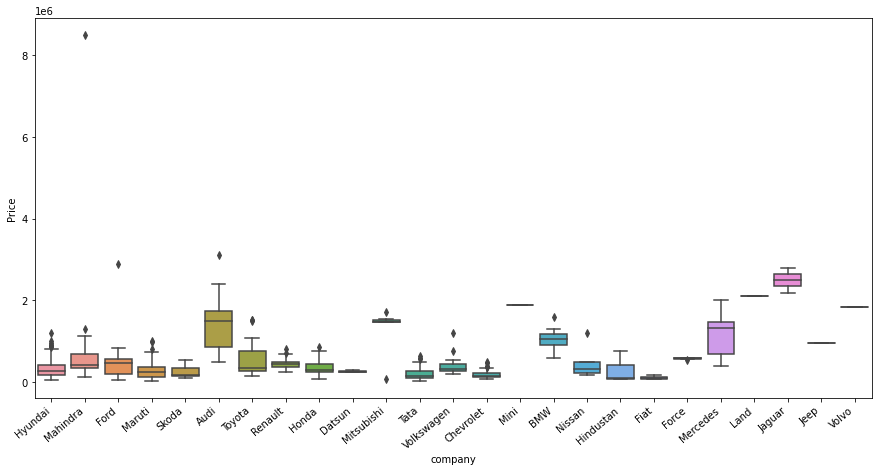

In [89]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Price vs Years

c:\Users\Sarthak Mahapatra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sarthak Mahapatra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sarthak Mahapatra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sarthak Mahapatra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sarthak Mahapatra\anaconda3\lib\site-packages\s

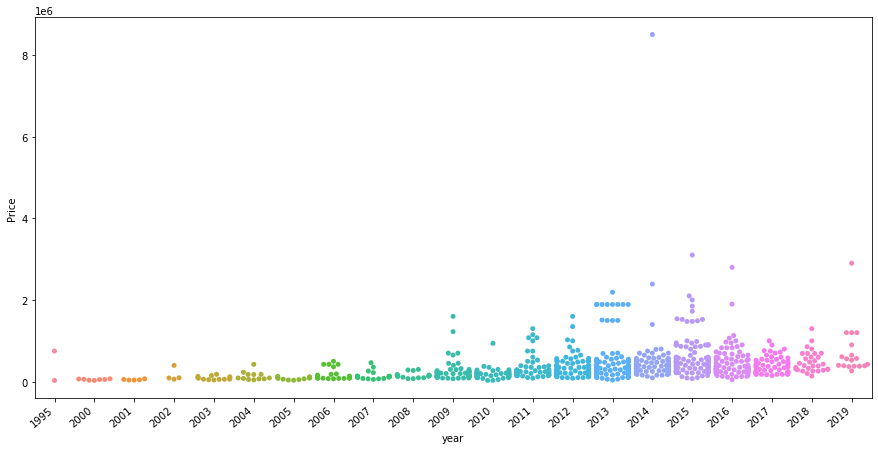

In [90]:
plt.subplots(figsize=(15,7))
ax=sns.swarmplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Fuel type vs Price

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

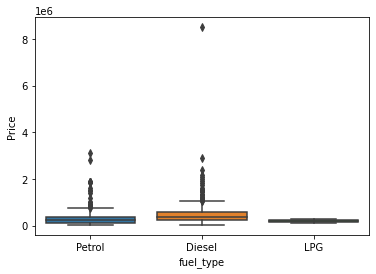

In [91]:
sns.boxplot(x='fuel_type',y='Price',data=df)

In [92]:
df.to_csv("Cleaned_Data.csv")

Data Preprocessing

Separate the data into feature columns and target columns

In [93]:
feature=df[['name','company','year','kms_driven','fuel_type']]
target=df['Price']

In [94]:
feature

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,36000,Diesel
6,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,27000,Diesel


In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=39)


In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV


In [97]:
#numerical columns
nums=['year','kms_driven']
#categorical columns
cats=['name','company','fuel_type']

In [98]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, nums),
        ("cat", categorical_transformer, cats),
    ]
)

In [110]:
 #Grid Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2200, num = 12)]
# Number of features to consider at every split
max_features =  ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [111]:
model=Pipeline(steps=[('preprocess',preprocessor),('regress',RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=0, random_state=42, n_jobs = 1))])

In [112]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'kms_driven']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('regress',
                 RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                                    n_jobs=1,
                                    param_distributions={'max_depth': [5, 10,
                                                                       15, 20,
                                                                       25, 30],
                                                         'max_features': ['sqrt'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              5,
                                                                              10],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10,
                                                                               15,
                                                                               100],
                                                         'n_estimators': [100,
                                                                          290,
                                                                          481,
                                                                          672,
                                                                          863,
                                                                          1054,
                                                                          1245,
                                                                          1436,
                                                                          1627,
                                                                          1818,
                                                                          2009,
                                                                          2200]},
                                    random_state=42,
                                    scoring='neg_mean_squared_error'))])

In [113]:
y_pred=model.predict(X_test)

In [114]:
print(r2_score(y_test,y_pred))

0.7011487669868119


In [115]:
model.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([401865.06568182])

c:\Users\Sarthak Mahapatra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

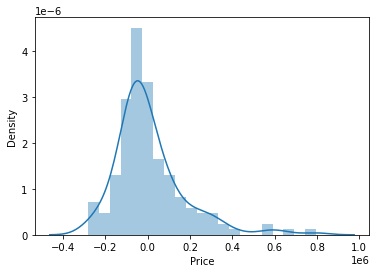

In [116]:
sns.distplot(y_test-y_pred)

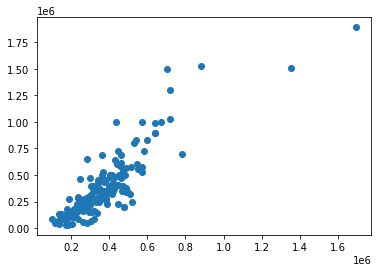

In [117]:
plt.scatter(y_pred,y_test)

In [118]:
import pickle
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)